## Start your script

Import libraries and fill the empty `base` string with the filepath for your data. Don't forget that Python will require you to double your backslashes -- instead of typing '\\' between folder names, type '\\\\'.

In [2]:
import pandas as pd
import numpy as np
from math import log
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Import sklearn functions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
from sklearn import linear_model as lm
from sklearn.metrics import mean_squared_error, mean_absolute_error



df = pd.read_csv('hr_data(2).csv')

# Separate y variable from dataframe
y = df['MonthlyIncome']
df = df.drop(columns='MonthlyIncome')

## 1. Check the `dtypes` of your data and identify which object columns need recoding

In [4]:
df.info()
print('Gender, attrition, and marital status ones that needs recoding')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      4410 non-null   int64 
 1   Attrition                4410 non-null   object
 2   BusinessTravel           4410 non-null   object
 3   Department               4410 non-null   object
 4   DistanceFromHome         4410 non-null   int64 
 5   Education                4410 non-null   int64 
 6   EducationField           4410 non-null   object
 7   EmployeeID               4410 non-null   int64 
 8   EnvironmentSatisfaction  4410 non-null   int64 
 9   Gender                   4410 non-null   object
 10  JobInvolvement           4410 non-null   int64 
 11  JobLevel                 4410 non-null   int64 
 12  JobRole                  4410 non-null   object
 13  JobSatisfaction          4410 non-null   int64 
 14  MaritalStatus            4410 non-null  

## 2. Recode `Attrition` and `Gender` into binary `TermIndicator` and `FemaleIndicator` variables and check your accuracy with a cross-tabs

In [5]:
df['FemaleIndicator'] = np.where(df['Gender'] == 'Female', 1, 0)

df['TermIndicator'] = np.where(df['Attrition'] == 'Yes', 1, 0)

pd.crosstab(df['FemaleIndicator'], df['TermIndicator'])


TermIndicator,0,1
FemaleIndicator,,
0,2205,441
1,1494,270


## 3. Use One Hot Encoding to recode `BusinessTravel`, `Department`, `EducationField`, `JobRole`, and `MaritalStatus` variables, then sum column values to check accuracy

In [15]:
df_obj = df.select_dtypes(include='object')
df_obj.head()
# df_obj = pd.get_dummies(df, columns = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus'])
# df_obj[['Travel_Rarely','Travel_Frequently','Non-Travel']].sum()
for col in df_obj.columns:
    print(df_obj[col].value_counts())

No     3699
Yes     711
Name: Attrition, dtype: int64
Travel_Rarely        3129
Travel_Frequently     831
Non-Travel            450
Name: BusinessTravel, dtype: int64
Research & Development    2883
Sales                     1338
Human Resources            189
Name: Department, dtype: int64
Life Sciences       1818
Medical             1392
Marketing            477
Technical Degree     396
Other                246
Human Resources       81
Name: EducationField, dtype: int64
Male      2646
Female    1764
Name: Gender, dtype: int64
Sales Executive              978
Research Scientist           876
Laboratory Technician        777
Manufacturing Director       435
Healthcare Representative    393
Manager                      306
Sales Representative         249
Research Director            240
Human Resources              156
Name: JobRole, dtype: int64
Married     2019
Single      1410
Divorced     981
Name: MaritalStatus, dtype: int64


## 4. Check for collinearity in your data by plotting correlation matrix on heatmap
(*Hint:* Plotting the correlation matrix in a heatmap was covered in Class 1.)

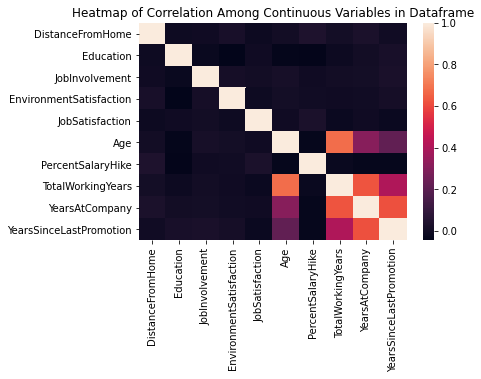

In [19]:
g = sns.heatmap(df[['DistanceFromHome', 'Education', 'JobInvolvement', 'EnvironmentSatisfaction',
                    'JobSatisfaction', 'Age', 'PercentSalaryHike', 'TotalWorkingYears',
                    'YearsAtCompany','YearsSinceLastPromotion']].corr())
g.set(title='Heatmap of Correlation Among Continuous Variables in Dataframe')
plt.show()

## 5. Select an appropriate scaler, fit to your X and y data, and print the head of your rescaled data
(*Hint:* You will need to concatenate your `y` vector back to your dataframe `df` and drop all non-numeric variables. Create a list of your column names to reapply to your scaled dataframe. Finally, separate your scaled y-value from your dataframe again.)

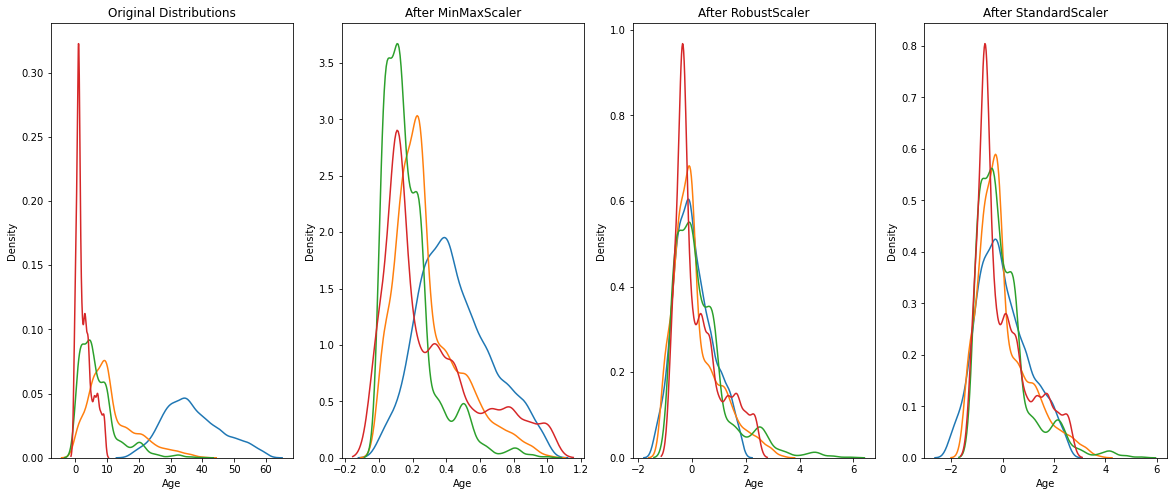

In [33]:
mini_df = df.select_dtypes(include='number')
mini_df
mini_df = mini_df.drop(columns=['EmployeeID', 'WorkLifeBalance','JobLevel'])
                                
col_names = list(mini_df.columns)
mini_df.head()
# Use MinMaxScaler
mm_scaler = MinMaxScaler()
df_mm = mm_scaler.fit_transform(mini_df)
df_mm = pd.DataFrame(df_mm, columns=col_names)

# Use RobustScaler
r_scaler = RobustScaler()
df_r = r_scaler.fit_transform(mini_df)
df_r = pd.DataFrame(df_r, columns=col_names)

# Use StandardScaler
s_scaler = StandardScaler()
df_s = s_scaler.fit_transform(mini_df)
df_s = pd.DataFrame(df_s, columns=col_names)

# Graph distributions of each transformation
fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(20, 8))

ax0.set_title('Original Distributions')
sns.kdeplot(mini_df['Age'], ax=ax0)
sns.kdeplot(mini_df['TotalWorkingYears'], ax=ax0)
sns.kdeplot(mini_df['YearsAtCompany'], ax=ax0)
sns.kdeplot(mini_df['NumCompaniesWorked'], ax=ax0)

ax1.set_title('After MinMaxScaler')
sns.kdeplot(df_mm['Age'], ax=ax1)
sns.kdeplot(df_mm['TotalWorkingYears'], ax=ax1)
sns.kdeplot(df_mm['YearsAtCompany'], ax=ax1)
sns.kdeplot(df_mm['NumCompaniesWorked'], ax=ax1)

ax2.set_title('After RobustScaler')
sns.kdeplot(df_r['Age'], ax=ax2)
sns.kdeplot(df_r['TotalWorkingYears'], ax=ax2)
sns.kdeplot(df_r['YearsAtCompany'], ax=ax2)
sns.kdeplot(df_r['NumCompaniesWorked'], ax=ax2)

ax3.set_title('After StandardScaler')
sns.kdeplot(df_s['Age'], ax=ax3)
sns.kdeplot(df_s['TotalWorkingYears'], ax=ax3)
sns.kdeplot(df_s['YearsAtCompany'], ax=ax3)
sns.kdeplot(df_s['NumCompaniesWorked'], ax=ax3)

plt.show()

## 6. Split data so that 66% of the data is in your training set and 33% is withheld as a testing set. Set seed to `123` and print the first five rows of your X_train dataframe

In [36]:
X_train, X_test, y_train, y_test = train_test_split(df_s, y, test_size=0.33,
                                                    random_state=123)
X_train.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,FemaleIndicator,TermIndicator
3790,-0.210661,-0.270544,-0.891688,1.169861,0.379672,-1.573999,-0.680283,-0.877232,-0.42623,0.241988,-1.065089,-0.620189,-0.654454,-0.368715,-0.595227,-0.816497,-0.438422
1583,-0.867672,-1.010909,0.085049,1.169861,1.785511,1.156302,2.528324,-0.877232,-0.42623,0.241988,-0.679157,2.483396,-0.654454,-0.368715,-0.595227,1.224745,-0.438422
1798,-1.415181,-1.010909,2.038524,0.252200,0.379672,-0.663899,-0.680283,-0.330589,-0.42623,0.241988,-1.322376,0.155707,-0.981014,-0.679146,-1.155935,1.224745,-0.438422
1533,-0.648668,1.827158,0.085049,1.169861,1.785511,1.156302,0.522945,-1.150554,-0.42623,2.589994,0.221349,0.931603,-0.001333,-0.368715,0.806541,-0.816497,-0.438422
664,0.774856,-0.764121,1.061787,0.252200,-2.432006,-1.573999,-0.680283,0.489376,-0.42623,-0.932014,1.893718,0.931603,2.937711,3.666880,2.488664,-0.816497,-0.438422


## 7. Fit a linear regression on the data using `statsmodels` and print the model summary
(*Hint:* Don't forget to add a constant!)

In [37]:
# Add constant to X_train feature set
X_train = sm.add_constant(X_train)

# Fit the linear model with statsmodels
sm_model = sm.OLS(y_train, X_train).fit()
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          MonthlyIncome   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     3.214
Date:                Sun, 18 Jul 2021   Prob (F-statistic):           8.94e-06
Time:                        20:38:05   Log-Likelihood:                -35948.
No. Observations:                2954   AIC:                         7.193e+04
Df Residuals:                    2936   BIC:                         7.204e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    6.498e+04    861.622     75.411      0.000    6.33e+04    6.67e+04
Age                     -2472.4146   1220.736     -2.025      0.043   -4866.001     -78.829
DistanceFromHome        -1234.3711    866.169     -1.425      0.154   -2932.731     463.989
Education                 -61.7359    870.377     -0.071      0.943   -1768.347    1644.875
EnvironmentSatisfaction  -361.1699    861.916     -0.419      0.675   -2051.191    1328.851
JobInvolvement            503.2453    856.767      0.587      0.557   -1176.679    2183.170
JobSatisfaction          1161.0267    864.344      1.343      0.179    -533.754    2855.808
NumCompaniesWorked        357.4296    954.726      0.374      0.708   -1514.571    2229.430
PercentSalaryHike       -1370.9244   1357.828     -1.010      0.313   -4033.315    1291.467
PerformanceRating        2196.1873   1356.000      1.620      0.105    -462.620    4854.994
StockOptionLevel         1236.4690    871.714      1.418      0.156    -472.764    2945.702
TotalWorkingYears       -1209.5562   1526.250     -0.793      0.428   -4202.184    1783.072
TrainingTimesLastYear    2724.0405    869.030      3.135      0.002    1020.070    4428.011
YearsAtCompany          -2928.6160   1757.124     -1.667      0.096   -6373.937     516.705
YearsSinceLastPromotion  5133.3934   1141.135      4.498      0.000    2895.887    7370.900
YearsWithCurrManager      916.2355   1395.786      0.656      0.512   -1820.583    3653.054
FemaleIndicator           -52.9259    869.295     -0.061      0.951   -1757.415    1651.563
TermIndicator           -1651.5968    900.080     -1.835      0.067   -3416.449     113.256
==============================================================================
Omnibus:                      583.102   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              982.786
Skew:                           1.326   Prob(JB):                    3.90e-214
Kurtosis:                       3.978   Cond. No.                         4.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 8. Fit a linear regression on the data using `sklearn` and print the coefficient dict

In [40]:
sk_model = lm.LinearRegression()
results = sk_model.fit(X_train, y_train)

features = list(X_train.columns)
coef_dict = {}

for coef, feat in zip(sk_model.coef_, features):
    coef_dict[feat] = coef

print('Coefficient Estimates:', coef_dict)

Coefficient Estimates: {'const': 0.0, 'Age': -2472.4145975020087, 'DistanceFromHome': -1234.3711388296165, 'Education': -61.73594919664975, 'EnvironmentSatisfaction': -361.16990247589257, 'JobInvolvement': 503.24525081146265, 'JobSatisfaction': 1161.0267110545208, 'NumCompaniesWorked': 357.42955733531574, 'PercentSalaryHike': -1370.9244015426614, 'PerformanceRating': 2196.1873061345686, 'StockOptionLevel': 1236.468962311547, 'TotalWorkingYears': -1209.556201985409, 'TrainingTimesLastYear': 2724.0405146388266, 'YearsAtCompany': -2928.6160156336177, 'YearsSinceLastPromotion': 5133.393416512348, 'YearsWithCurrManager': 916.235464757116, 'FemaleIndicator': -52.925904925780806, 'TermIndicator': -1651.5967747966706}


## 9. Use your regression model(s) to predict `MonthlyIncome` and display alongside the true y-values

In [45]:
y_train = y_train.reset_index(drop=True)

# Predict y-values on the training set with statsmodels
sm_yhat = sm_model.predict(X_train)
sm_yhat = pd.Series(sm_yhat).reset_index(drop=True)

# Predict y-values on the training set with sklearn
sk_yhat = sk_model.predict(X_train)
sk_yhat = pd.Series(sk_yhat).reset_index(drop=True)

# Concatenate the predicted salaries with the true salary and compare
train_predictions = pd.concat([y_train, sm_yhat, sk_yhat], axis=1)
train_predictions.columns = ['True_Y', 'SM_Pred', 'SK_Pred']
train_predictions.index = X_train.index.copy()
train_predictions['Subset'] = 'Training'
train_predictions.head(10)

,True_Y,SM_Pred,SK_Pred,Subset
3790,22770,63994.214385,63994.214385,Training
1583,66670,79375.941300,79375.941300,Training
1798,81890,69509.760652,69509.760652,Training
1533,10810,72055.687918,72055.687918,Training
664,47070,71307.699367,71307.699367,Training
1522,132250,67984.728764,67984.728764,Training
3713,59800,59113.536058,59113.536058,Training
945,133200,57790.973871,57790.973871,Training
190,25710,58689.635619,58689.635619,Training
1199,35780,57640.321723,57640.321723,Training


## 10. Spend some time tuning the best model you can think of, keeping in mind variable scaling, collinearity, and other feature engineering. Print your model $R^2$ -- is it better than the model built in Q7/8?